In [1]:
import pandas as  pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5561,ham,Get me out of this dump heap. My mom decided t...,NaN,NaN,NaN
1932,ham,Jus finished avatar nigro,NaN,NaN,NaN
3811,ham,Yep then is fine 7.30 or 8.30 for ice age.,NaN,NaN,NaN
2686,ham,There r many model..sony ericson also der.. &l...,NaN,NaN,NaN
2960,ham,I'm doing da intro covers energy trends n pros...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
#1 Data Clean
#2 EDA
#3 Text Preprocessing
# Model Building
# Model Evaluatiion
# Improvement
# Website
# Deploy

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 columns

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [11]:
df.sample(5)

,target,text
2959,ham,Sir send to group mail check it.
3377,ham,Hows that watch resizing
3524,ham,I not free today i haf 2 pick my parents up to...
876,ham,Are you in castor? You need to see something
3458,spam,Not heard from U4 a while. Call me now am here...


In [12]:
# pip install scikit-learn

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder = LabelEncoder()

In [15]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

In [16]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [17]:
df['target'] = encoder.fit_transform(df['target'])

In [18]:
df['target'].unique()

array([0, 1])

In [19]:
# Check Missing Value
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
# Check For Duplicate values
df.duplicated().sum()

np.int64(403)

In [21]:
df = df.drop_duplicates(keep='first')

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.shape

(5169, 2)

In [24]:
#2 EDA

In [25]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [27]:
# pip install matplotlib

In [28]:
# pip install seaborn

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

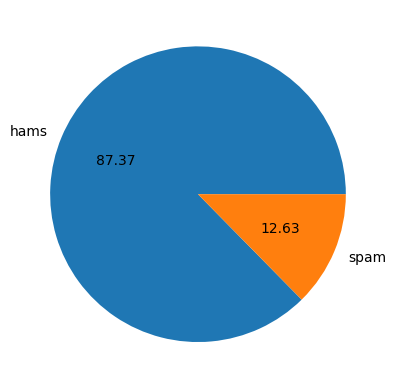

In [30]:
plt.pie(df['target'].value_counts(), labels=['hams', 'spam'], autopct='%0.2f')
plt.show()

In [31]:
# Data is imbalanced

In [32]:
import nltk

In [33]:
# nltk.download('punkt')
# nltk.download('punkt_tab')

In [34]:
df['num_characters']= df['text'].apply(len)

In [35]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [36]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [37]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [39]:
import seaborn as sns

In [40]:
# sns.pairplot(df, hue='target')

In [41]:
# sns.pairplot(df)

In [42]:
print("Hii")

Hii


In [45]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [47]:
# Spam Data Analysis

In [48]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

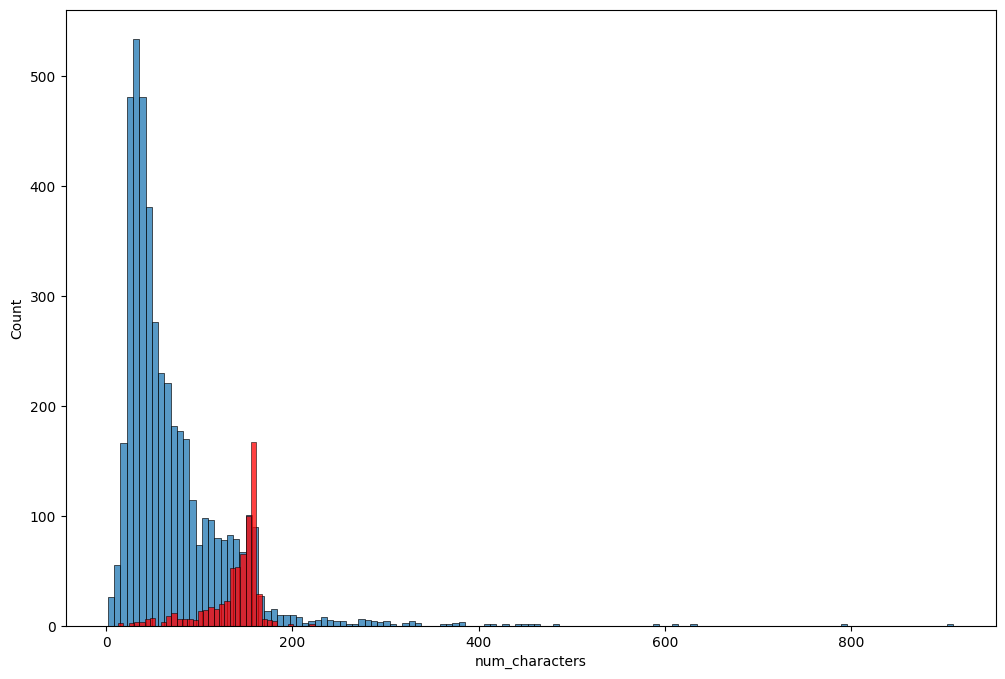

In [52]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

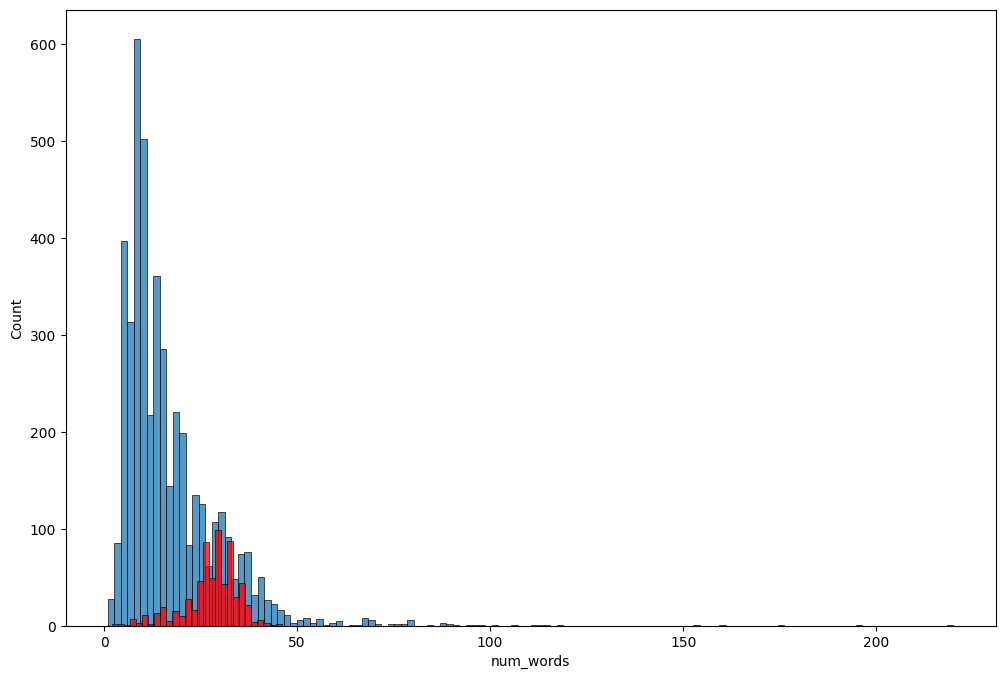

In [53]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

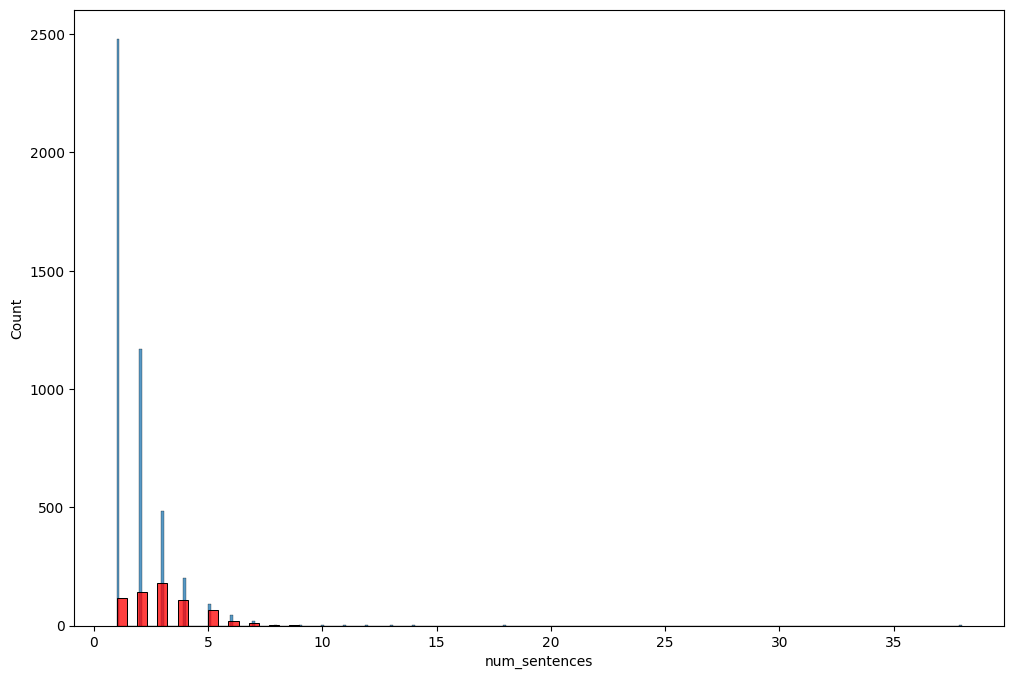

In [54]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

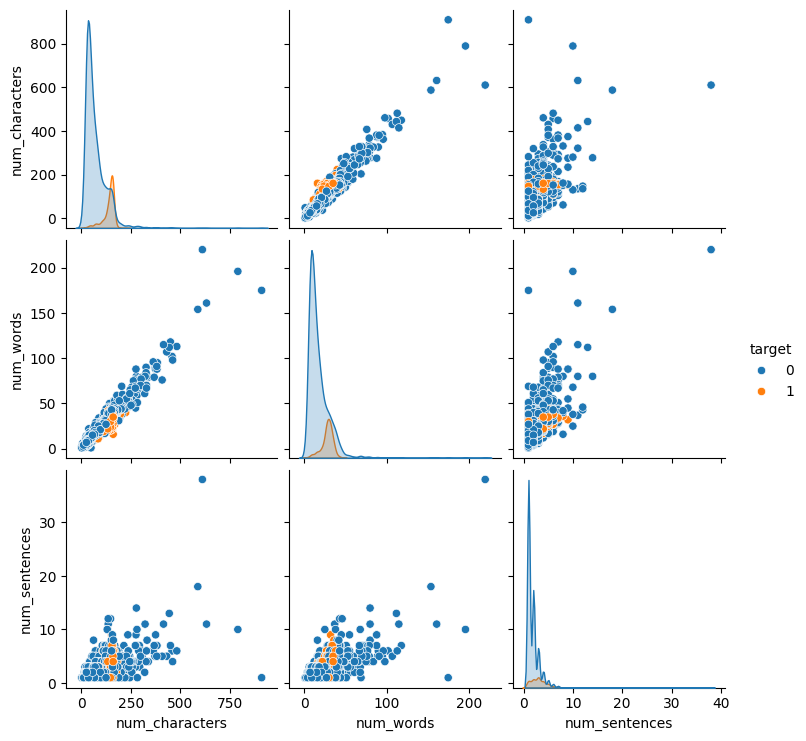

In [57]:
sns.pairplot(df, hue='target')

In [65]:
df.corr(numeric_only=True)

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

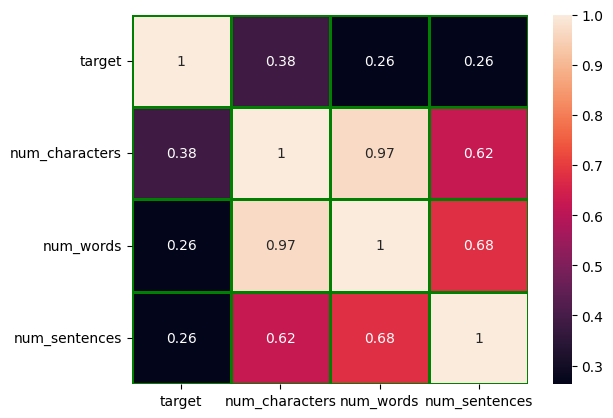

In [73]:
sns.heatmap(df.corr(numeric_only=True), annot=True, linecolor='green', linewidths=2)

In [74]:
# DATA PREPROCESSION

# Lower case
# Tokenization
# Removing Special chars
# Removing stop words and punctuation 
# Stemming

In [121]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    pr = PorterStemmer()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(pr.stem(i))
    return " ".join(y)



In [97]:
from nltk.corpus import stopwords
# nltk.download('stopwords')
# stopwords.words('english')

In [123]:
transform_text("Hi How Are You doing do dancing and loving and caring %% 20 @0#")

'hi danc love care 20 0'

In [89]:
import string

In [90]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [126]:
df['transformed_text'] = df['text'].apply(transform_text)

In [127]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [132]:
from wordcloud import WordCloud
wc = WordCloud()

In [130]:
# pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


In [139]:
wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

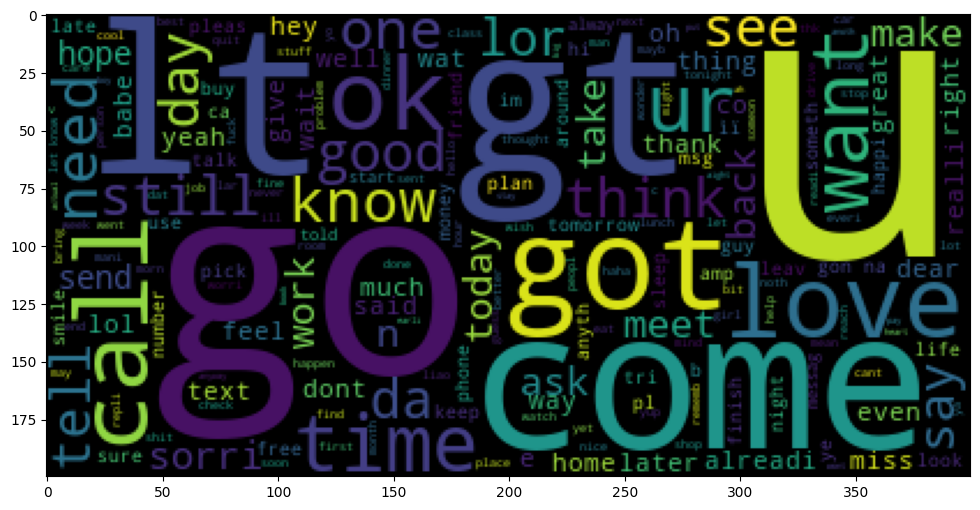

In [195]:
plt.figure(figsize=(12,6))
plt.imshow(wc)

In [151]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

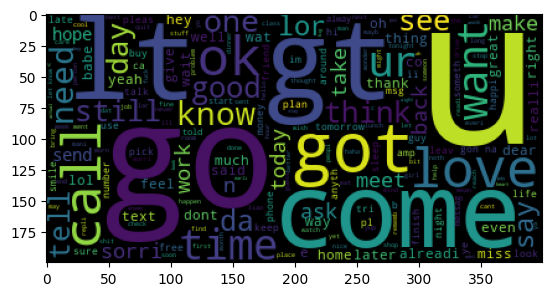

In [152]:
plt.imshow(ham_wc)

In [159]:
# Filter top 50 keywords in spam or ham for that writting custom code
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [174]:
# spam_corpus

In [161]:
len(spam_corpus)

9939

In [164]:
from collections import Counter
df1 = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [165]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       30 non-null     object
 1   1       30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes


In [170]:
df1.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


In [172]:
df1[1]

0     320
1     191
2     155
3     141
4     122
5     119
6     119
7     114
8     104
9     103
10     98
11     97
12     82
13     74
14     64
15     64
16     63
17     60
18     57
19     57
20     56
21     55
22     52
23     51
24     51
25     49
26     48
27     45
28     45
29     45
Name: 1, dtype: int64

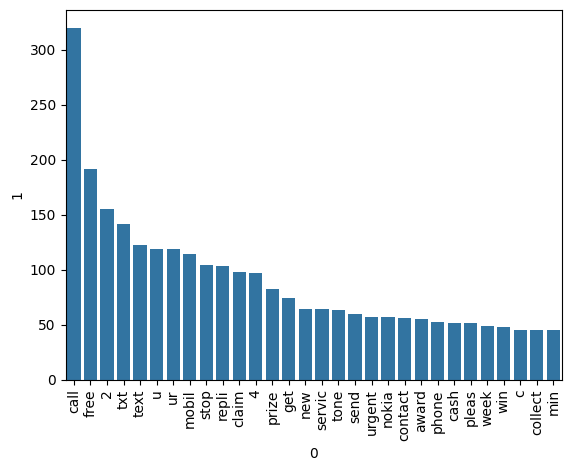

In [200]:
# sns.countplot(df1[0])

sns.barplot(data=df1,x=df1[0], y = df1[1])
plt.xticks(rotation='vertical')
plt.show()

In [201]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [202]:
df2 = pd.DataFrame(Counter(ham_corpus).most_common(30))

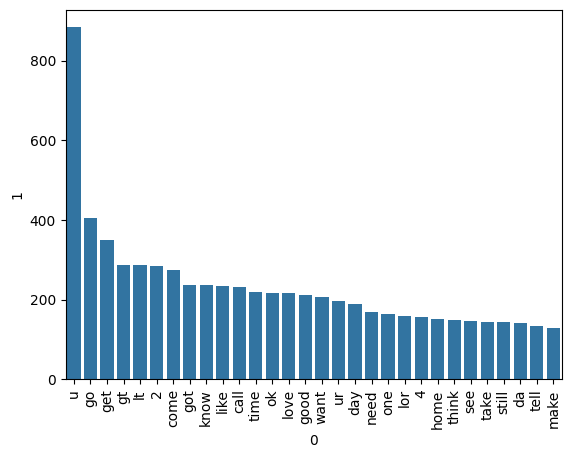

In [203]:
sns.barplot(data=df2,x=df2[0], y = df2[1])
plt.xticks(rotation='vertical')
plt.show()

In [204]:
# Start Model Building (Naive Base)

In [205]:
# Text to vectors -> bag of wordds, tfidf, word to vec

In [246]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [269]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [270]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [271]:
y = df['target'].values

In [272]:
y.shape

(5169,)

In [273]:
from sklearn.model_selection import train_test_split

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) 

In [275]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [276]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [277]:
gnb.fit(X_train, y_train)

GaussianNB()

In [278]:
y_predict1 = gnb.predict(X_test)

In [279]:
print(accuracy_score(y_test, y_predict1))
print(confusion_matrix(y_test, y_predict1))
print(precision_score(y_test, y_predict1))

0.8762088974854932
[[784 112]
 [ 16 122]]
0.5213675213675214


In [280]:
mnb.fit(X_train, y_train)
y_predict2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_predict2))
print(confusion_matrix(y_test, y_predict2))
print(precision_score(y_test, y_predict2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [281]:
bnb.fit(X_train, y_train)
y_predict3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_predict3))
print(confusion_matrix(y_test, y_predict3))
print(precision_score(y_test, y_predict3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [282]:
# Chhossed tfidf with mnb module

In [283]:
import pickle

In [284]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))

In [285]:
pickle.dump(mnb, open('model.pkl', 'wb'))